In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets'
os.listdir(working_dir)

['cyto_labels_combined.npy',
 'cyto_profiles_combined.npy',
 'cyto_profiles_combined_samples.npy',
 'cyto_tsne_combined.npy',
 'd35_wt',
 'd60_wt',
 'niche_labels_combined.npy',
 'niche_proximities_combined.npy',
 'niche_proximities_samples.npy',
 'niche_proximity_combined.png',
 'niche_tsne_combined.npy',
 'old']

In [4]:
d35_dir = os.path.join(working_dir, 'd35_wt')
d60_dir = os.path.join(working_dir, 'd60_wt')
d35_datasets = [os.path.join(d35_dir, dataset) for dataset in os.listdir(d35_dir)]
d60_datasets = [os.path.join(d60_dir, dataset) for dataset in os.listdir(d60_dir)]
datasets = d35_datasets + d60_datasets
datasets

['/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_14_35_07_AA_org1_488LP13_561LP120_642LP60',
 '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_15_50_16_AA_org2_488LP13_561LP120_642LP60',
 '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_16_09_03_AA_org3_488LP13_561LP120_642LP60',
 '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190430_11_36_09_AA-4.30.19-org1_488LP12p5_561LP120_642LP50',
 '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190430_15_06_10_AA-4.30.19-org3_488LP13_561LP120_642LP50',
 '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d60_wt/20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP50']

<IPython.core.display.Javascript object>


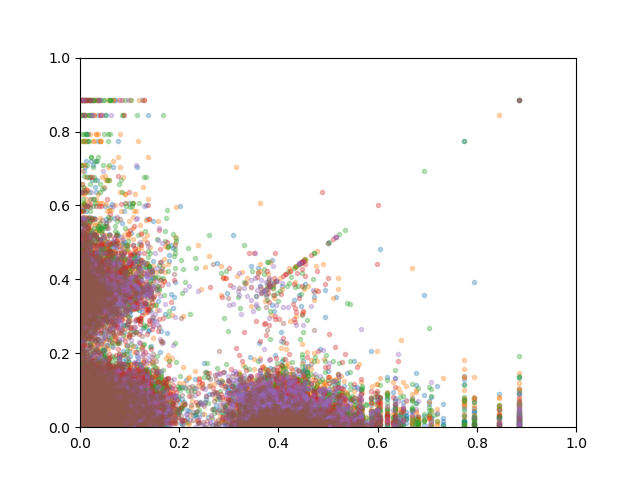

In [97]:
proximities = [np.load(os.path.join(d, 'niche_proximities_sample.npy')) for d in datasets]
for p in proximities:
    plt.plot(p[:, 0], p[:, 1], '.', alpha=0.3)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

In [84]:
proximities = np.load(os.path.join(working_dir, 'niche_proximities_combined.npy'))
x_tsne = np.load(os.path.join(working_dir, 'niche_tsne_combined.npy'))
organoid = np.load(os.path.join(working_dir, 'niche_proximities_samples.npy')).astype(np.int)
proximities.shape, x_tsne.shape, organoid.shape

((30000, 2), (30000, 2), (30000,))

In [85]:
# organoid = np.concatenate([np.ones(5000), 2*np.ones(5000), 3*np.ones(5000)]).astype(np.int)
organoid

array([0, 0, 0, ..., 5, 5, 5])

<IPython.core.display.Javascript object>


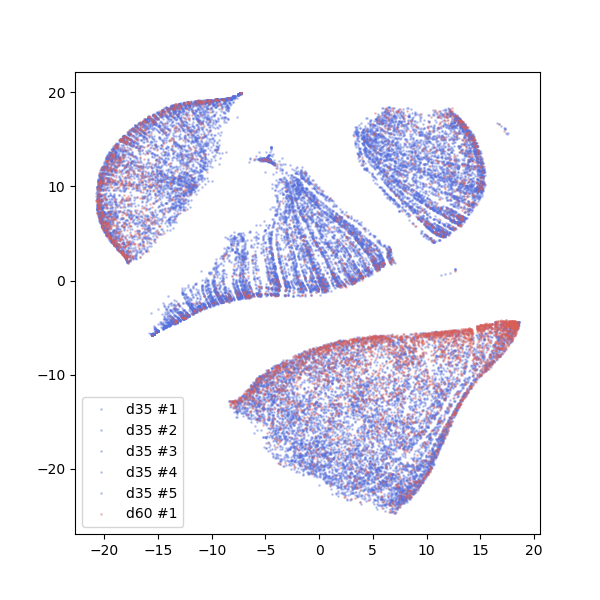

In [151]:
labels = ['d35 #1', 'd35 #2', 'd35 #3', 'd35 #4', 'd35 #5', 'd60 #1']
colors = sns.color_palette("hls", 8)

fig = plt.figure(figsize=(6, 6))
for i in range(6):
    idx = np.where(organoid == i)[0]
    if i == 5:
        plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', color=colors[0], alpha=0.3, markersize=2, label=labels[i])
    else:
        plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', color=colors[5], alpha=0.3, markersize=2, label=labels[i])
plt.legend()
plt.show()
fig.savefig('tsne_3orgs.png')

In [99]:
labels = np.load(os.path.join(working_dir, 'niche_labels_combined.npy'))
labels.shape

(30000,)

In [103]:
clusters = ['Non-proximal', 'SOX2 adjacent', 'TBR1 adjacent', 'Intermediates']
for i in range(6):
    idx = np.where(organoid == i)[0]
    lbls = labels[idx]
    n = len(lbls)
    print(f'Organoid {i}')
    for j in range(4):
        count = len(np.where(lbls == j)[0])
        if count == 0:
            continue
        frac = count / n
        print(f'{frac * 100:.2f}% {clusters[j]}')
    print('')

Organoid 0
41.52% Non-proximal
42.42% SOX2 adjacent
15.54% TBR1 adjacent
0.52% Intermediates

Organoid 1
32.46% Non-proximal
43.02% SOX2 adjacent
23.32% TBR1 adjacent
1.20% Intermediates

Organoid 2
31.92% Non-proximal
46.18% SOX2 adjacent
20.68% TBR1 adjacent
1.22% Intermediates

Organoid 3
32.80% Non-proximal
45.08% SOX2 adjacent
20.76% TBR1 adjacent
1.36% Intermediates

Organoid 4
33.10% Non-proximal
46.14% SOX2 adjacent
19.74% TBR1 adjacent
1.02% Intermediates

Organoid 5
62.50% Non-proximal
18.04% SOX2 adjacent
19.20% TBR1 adjacent
0.26% Intermediates



# d35 niche

In [5]:
proximities = np.load(os.path.join(d35_datasets[0], 'niche_proximities.npy'))
gate_labels = np.load(os.path.join(d35_datasets[0], 'nuclei_fluorescence', 'nuclei_gating.npy'))

proximities.shape, gate_labels.shape

((2173528, 2), (2173528, 2))

In [6]:
dn_labels = np.logical_and(gate_labels[:, 0] == 0, gate_labels[:, 1] == 0)

In [7]:
gate_labels = np.asarray([gate_labels[:, 0], gate_labels[:, 1], dn_labels]).T
gate_labels.shape

(2173528, 3)

In [8]:
from scout.niche import randomly_sample

In [10]:
proximities, gate_labels = randomly_sample(100000, proximities, gate_labels)

<IPython.core.display.Javascript object>


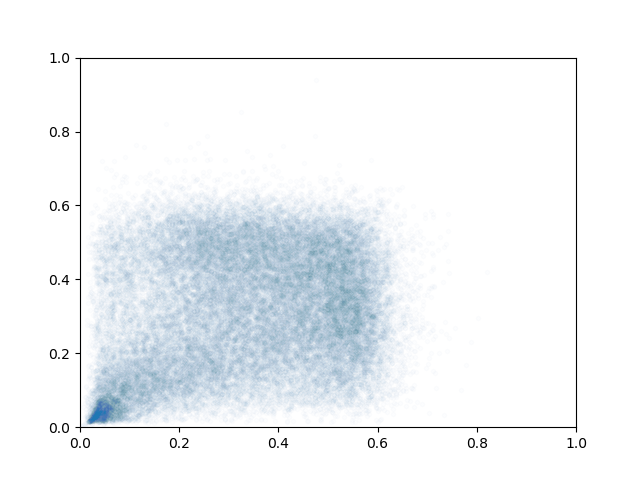

In [21]:
names = ['SOX2', 'TBR1', 'DN']

for i, labels in enumerate(gate_labels.T):
    idx = np.where(labels)[0]
    if i != 2:
        continue
    plt.plot(proximities[idx, 0], proximities[idx, 1], '.', alpha=0.01, label=names[i])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [242]:
dp_labels = np.logical_and(gate_labels[:, 0] == 1, gate_labels[:, 1] == 1)
dp_labels.sum() / len(gate_labels)

0.007232

In [246]:
high_right = (proximities[:, 0] > 0.67)
high_top = (proximities[:, 1] > 0.63)
low_right = (proximities[:, 0] > 0.3)
low_top = (proximities[:, 1] > 0.28)

In [247]:
btm_left = np.logical_not(np.logical_or(low_right, low_top))
btm_right = np.logical_and(high_right, np.logical_not(high_top))
top_left = np.logical_and(high_top, np.logical_not(high_right))
top_right = np.logical_and(high_right, high_top)
intermediate = np.logical_and(np.logical_not(btm_left), np.logical_not(np.logical_or(high_right, high_top)))

<IPython.core.display.Javascript object>


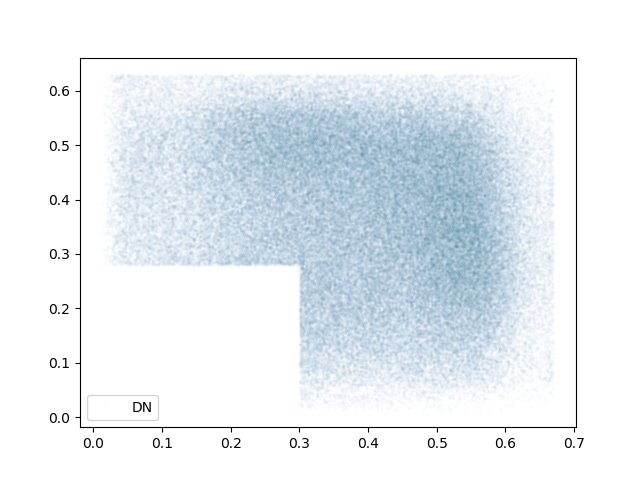

In [248]:
idx = np.where(intermediate)[0]
plt.plot(proximities[idx, 0], proximities[idx, 1], '.', alpha=0.01, markersize=3, label=names[i])
plt.legend()
plt.show()

In [273]:
d35_ratio = proximities[idx, 1] / proximities[idx, 0]

# d60 niche

In [274]:
proximities = np.load(os.path.join(d60_datasets[0], 'niche_proximities.npy'))
gate_labels = np.load(os.path.join(d60_datasets[0], 'nuclei_fluorescence', 'gate_labels.npy'))

proximities.shape, gate_labels.shape

((8821701, 2), (8821701, 2))

In [275]:
dn_labels = np.logical_and(gate_labels[:, 0] == 0, gate_labels[:, 1] == 0)

In [276]:
gate_labels = np.asarray([gate_labels[:, 0], gate_labels[:, 1], dn_labels]).T
gate_labels.shape

(8821701, 3)

In [277]:
from scout.niche import randomly_sample

In [278]:
proximities, gate_labels = randomly_sample(500000, proximities, gate_labels)

<IPython.core.display.Javascript object>


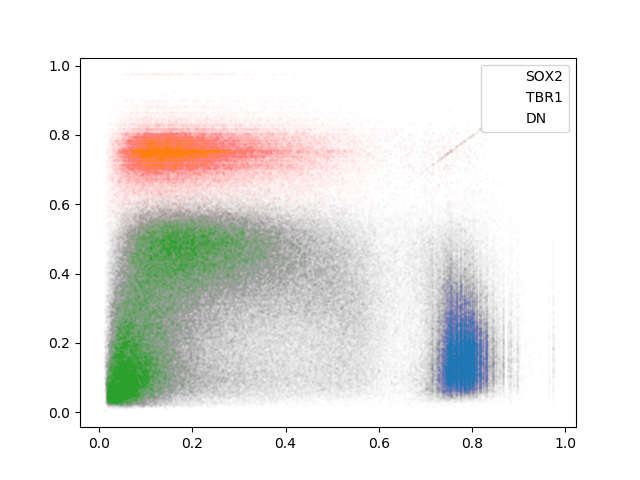

In [279]:
names = ['SOX2', 'TBR1', 'DN']

for i, labels in enumerate(gate_labels.T):
    idx = np.where(labels)[0]
#     if i == 0:
#         continue
    plt.plot(proximities[idx, 0], proximities[idx, 1], '.', alpha=0.005, markersize=3, label=names[i])
plt.legend()
plt.show()

In [280]:
high_right = (proximities[:, 0] > 0.67)
high_top = (proximities[:, 1] > 0.63)
low_right = (proximities[:, 0] > 0.3)
low_top = (proximities[:, 1] > 0.28)

In [281]:
btm_left = np.logical_not(np.logical_or(low_right, low_top))
btm_right = np.logical_and(high_right, np.logical_not(high_top))
top_left = np.logical_and(high_top, np.logical_not(high_right))
top_right = np.logical_and(high_right, high_top)
intermediate = np.logical_and(np.logical_not(btm_left), np.logical_not(np.logical_or(high_right, high_top)))

<IPython.core.display.Javascript object>


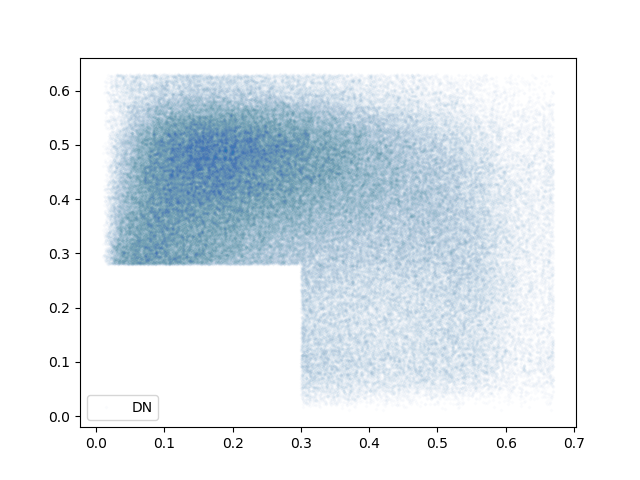

In [282]:
idx = np.where(intermediate)[0]
plt.plot(proximities[idx, 0], proximities[idx, 1], '.', alpha=0.01, markersize=3, label=names[i])
plt.legend()
plt.show()

In [283]:
d60_ratio = proximities[idx, 1] / proximities[idx, 0]

<IPython.core.display.Javascript object>


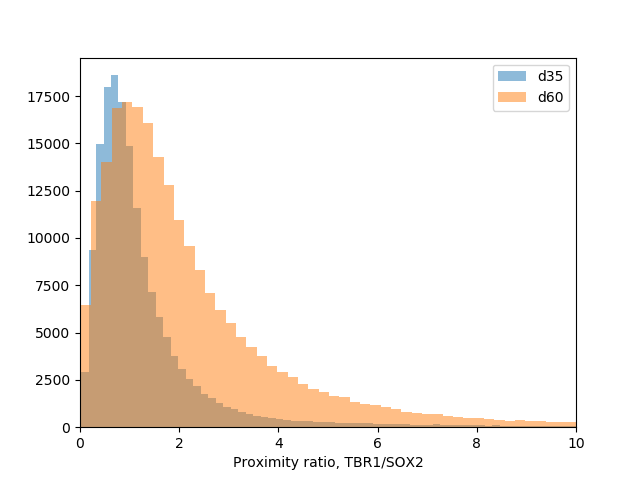

In [290]:
plt.hist(d35_ratio, bins=256, alpha=0.5, label='d35')
plt.hist(d60_ratio, bins=256, alpha=0.5, label='d60')
plt.xlim([0, 10])
plt.xlabel('Proximity ratio, TBR1/SOX2')
plt.legend()
plt.show()